(289, 383, 4)

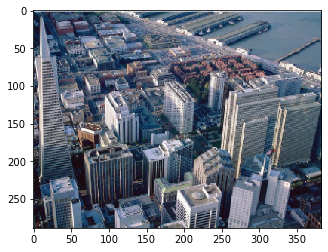

In [1]:
import numpy as np
import math
import matplotlib.image as im
import matplotlib.pyplot as plt
%matplotlib inline

figure = im.imread("warping.png")
plt.imshow(figure)

figure.shape

In [2]:
width = figure.shape[0]
height = figure.shape[1]

cx = width // 2
cy = height // 2

print(cx,cy)

144 191


In [117]:
def sphereWarping(img,outWidth,outHeight,mode="square"):
    col,row,dim=img.shape
    output = np.zeros([outHeight,outWidth,dim])
    print(output.shape)
    d_0 = min(row,col) // 2
    r_0 = min(outHeight,outWidth) // 2 
    for i in range(outHeight):
        for j in range(outWidth):
            x = i-outHeight//2
            y = j-outWidth//2
            flag = 0
            angle = math.atan2(x,y)
            if (x**2+y**2)**(0.5)< r_0:
                dist = 2*d_0*math.asin((x**2+y**2)**(0.5)/(outHeight//2))/math.pi
                if mode == "square":
                    X = int(dist*math.sin(angle))
                    Y = int(dist*math.cos(angle))
                elif mode == "modify":
                    if row<col:
                        X = int(dist*math.sin(angle)*col/row)
                        Y = int(dist*math.cos(angle))
                    elif row>=col:
                        X = int(dist*math.sin(angle))
                        Y = int(dist*math.cos(angle)*row/col)
                output[i][j]=img[X+cx][Y+cy]
    return output

(300, 300, 4)


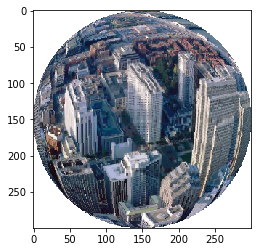

In [122]:
res=sphereWarping(figure,300,300,mode="modify")
plt.imshow(res)
im.imsave("hw2-2.2.png",res)

(300, 300, 4)


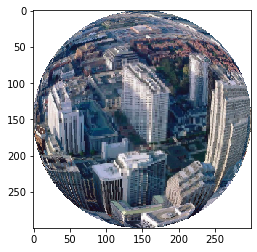

In [121]:
res=sphereWarping(figure,300,300)
plt.imshow(res)
im.imsave("hw2-2.1.png",res)

In [87]:
src = im.imread("source.jpg")
trg = im.imread("target.jpg")
print(src.shape,trg.shape)

(524, 699, 3) (524, 699, 3)


In [88]:
A = np.array([[0,524,0,524],[0,0,699,699],[1,1,1,1]])
B = np.array([[195,315,264,389],[192,169,536,508],[1,1,1,1]])
r1 = np.linalg.pinv(A)
TR = np.dot(B,r1)
print(TR)

[[ 2.33778626e-01  1.02288984e-01  1.93750000e+02]
 [-4.86641221e-02  4.88555079e-01  1.93250000e+02]
 [ 1.08420217e-18  7.58941521e-19  1.00000000e+00]]


In [89]:
def projection(src, trg, trans):
    width = trg.shape[0]
    height = trg.shape[1]
    output = src.copy()
    for i in range(width):
        for j in range(height):
            res = np.dot(trans, np.array([i,j,1]).T)
            x = int(res[0])
            y = int(res[1])
            output[x][y]=trg[i][j]
    return output

In [99]:
trans = np.linalg.inv(TR)

def projection(src, trg, trans):
    width = trg.shape[0]
    height = trg.shape[1]
    output = src.copy()
    for i in range(width):
        for j in range(height):
            mid = np.array([i,j,1]).T
            res = np.dot(trans, mid)
            x = int(res[0])
            y = int(res[1])
            if x<src.shape[0] and x>=0 and y<src.shape[1] and y>=0:
                output[i][j]=trg[x][y]
    return output

uint8
uint8


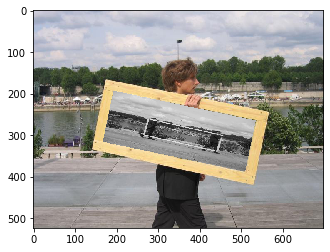

In [101]:
output = projection(trg, src, trans)
print(output.dtype)
print(trg.dtype)
plt.imshow(output)
im.imsave("hw2-12.jpg",output)

In [128]:
def myWarping(img):
    width = img.shape[0]
    height = img.shape[1]
    output = np.zeros((width,height,3))
    cx = width//2
    cy = height//2
    for i in range(0,height):
        for j in range(0,width):
            x = i - cy
            y = j - cx
            radian = math.atan2(y,x)
            radius = int(math.sqrt(x**2+y**2))
            X = int(radius*math.cos(radian+0.002*radius))+cx
            Y = int(radius*math.sin(radian+0.002*radius))+cy
            X = min(width-1, max(0,X))
            Y = min(height-1, max(0,Y))
            output[j][i] = img[X][Y]/255
    return output
            

(4000, 6000, 3)
(4000, 6000, 3)


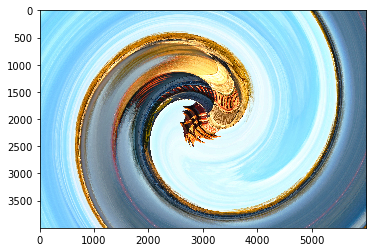

In [129]:
img = im.imread("123.jpg")
output= myWarping(img)
print(output.shape)
print(img.shape)
plt.imshow(output)

In [130]:
im.imsave("111.jpg",output)